<a href="https://colab.research.google.com/github/Hasebul21/udemy-machine-learning/blob/main/feature_engineering_lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [18]:
df = pd.read_csv('/multiple_linear_dataset_with_categorical.csv')
df.isnull().sum()

,0
Experience,3
EducationLevel,0
Age,3
HoursPerWeek,0
Salary,0
Department,3
City,2
Gender,2


In [19]:
X = df.drop("Salary", axis=1)
Y = df["Salary"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
Numerical_columns = ["Experience", "EducationLevel", "Age", "HoursPerWeek"]
Categorial_columns = ["Department", "City", "Gender"]

In [21]:
preprocessor = ColumnTransformer([

   ("Numerical Data", Pipeline([
       ("a", SimpleImputer(strategy="median")),
       ("scaler", StandardScaler())
   ]), Numerical_columns),

   ("Categoric Data", Pipeline([
       ("b", SimpleImputer(strategy="most_frequent")),
       ("c", OneHotEncoder(handle_unknown="ignore"))
   ]), Categorial_columns)

], remainder="passthrough")

In [22]:
model = Pipeline(steps=[

    ("a", preprocessor),
    ("regression", LinearRegression())
])
model.fit(x_train, y_train)

Pipeline(steps=[('a',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical Data',
                                                  Pipeline(steps=[('a',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Experience',
                                                   'EducationLevel', 'Age',
                                                   'HoursPerWeek']),
                                                 ('Categoric Data',
                                                  Pipeline(steps=[('b',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('c',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Department', 'City',
                                                   'Gender'])])),
                ('regression', LinearRegression())])

In [23]:
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

Mean Squared Error: 9476409.95074362
Mean Absolute Error: 2383.8800656502835
R2 Score: 0.6836621611239093


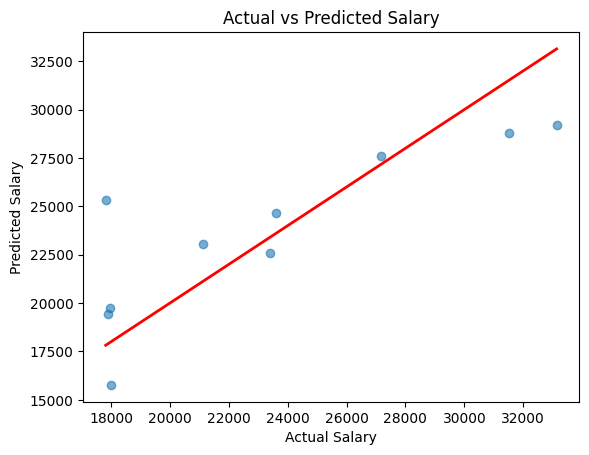

In [24]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linewidth=2)  # ideal line
plt.show()